# 2. Analysing the Extracted Data

In [1]:
# Import the dependencies used in the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi
import numpy as np
from scipy.stats import linregress

# Format numbers in DataFrames to have two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Load the data created in part 1
city_df = pd.read_csv("Data/City Data.csv")

# Convert Date to a readable format
city_df["Date"] = pd.to_datetime(city_df["Date"],unit="s")
city_df["Date"] = city_df["Date"].dt.date
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,abonnema,4.71,6.79,75.49,87,100,8.21,NG,2022-09-25
1,abu dhabi,24.47,54.37,89.71,81,0,4.61,AE,2022-09-25
2,acurenam,1.03,10.65,69.08,99,99,3.83,GQ,2022-09-25
3,adrar,20.50,-10.07,99.12,22,24,7.70,MR,2022-09-25
4,ahipara,-35.17,173.17,57.38,89,92,10.49,NZ,2022-09-25
...,...,...,...,...,...,...,...,...,...
555,zalari,53.56,102.51,33.58,90,100,3.15,RU,2022-09-25
556,zaysan,47.47,84.87,65.17,27,5,6.76,KZ,2022-09-25
557,zhaozhou,45.68,125.32,53.82,38,52,12.01,CN,2022-09-25
558,zhigalovo,54.81,105.16,32.81,97,94,0.94,RU,2022-09-25


### 2.1 Identifying Outliers

In [2]:
# Create a summary statistics table for the relevant datapoints
city_df[["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]].describe().loc[["mean", "std", "min", "25%", "50%", "75%", "max"]]

,Max Temp,Humidity,Cloudiness,Wind Speed
mean,65.82,69.83,58.89,8.25
std,17.51,20.80,38.12,6.05
min,18.10,7.00,0.00,0.00
25%,53.48,58.00,20.00,3.44
50%,69.71,74.00,71.50,6.91
75%,78.46,85.00,98.00,11.50
max,103.41,100.00,100.00,40.04


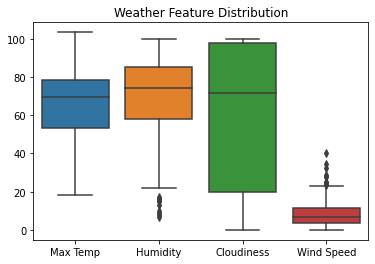

In [3]:
# Create boxplots for the datapoints and save the created graph as an image
sns.boxplot(data = city_df[["Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]).set(title="Weather Feature Distribution")
plt.savefig("Images/Weather Feature Boxplot.png")
plt.show()

In [4]:
# Identify the outliers in humidity

Humidity_Q1 = city_df["Humidity"].quantile(0.25)
Humidity_Q3 = city_df["Humidity"].quantile(0.75)
Humidity_IQR = Humidity_Q3 - Humidity_Q1

Humidity_Outliers = city_df[((city_df["Humidity"]<(Humidity_Q1-1.5*Humidity_IQR)) | (city_df["Humidity"]>(Humidity_Q3+1.5*Humidity_IQR)))]
Humidity_Outliers

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
28,araouane,18.90,-3.53,102.76,16,66,6.62,ML,2022-09-25
31,arlit,18.74,7.39,103.41,8,25,7.47,NE,2022-09-25
67,bilma,18.69,12.92,97.11,10,22,5.46,NE,2022-09-25
68,birjand,32.87,59.22,66.67,9,0,6.91,IR,2022-09-25
148,eenhana,-17.47,16.33,80.40,15,3,7.85,NaN,2022-09-25
164,gat,31.61,34.76,84.40,16,0,9.24,IL,2022-09-25
362,oshikango,-17.40,15.88,80.98,15,2,8.16,NaN,2022-09-25
405,presidencia roque saenz pena,-26.79,-60.44,86.88,17,80,6.76,AR,2022-09-25
406,prieska,-29.66,22.75,75.43,16,67,16.53,ZA,2022-09-25
485,tahta,26.77,31.50,97.83,13,1,12.48,EG,2022-09-25


In [5]:
# Identify the outliers in wind speed

WindSpeed_Q1 = city_df["Wind Speed"].quantile(0.25)
WindSpeed_Q3 = city_df["Wind Speed"].quantile(0.75)
WindSpeed_IQR = WindSpeed_Q3 - WindSpeed_Q1

WindSpeed_Outliers = city_df[((city_df["Wind Speed"]<(WindSpeed_Q1-1.5*WindSpeed_IQR)) | (city_df["Wind Speed"]>(WindSpeed_Q3+1.5*WindSpeed_IQR)))]
WindSpeed_Outliers

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
46,bandarbeyla,9.49,50.81,77.36,85,57,24.61,SO,2022-09-25
74,brae,60.40,-1.35,50.99,73,72,25.05,GB,2022-09-25
105,carnarvon,-24.87,113.63,63.97,57,0,25.14,AU,2022-09-25
176,gravdal,68.12,13.50,54.45,66,89,28.27,NO,2022-09-25
185,haapiti,-17.57,-149.87,78.53,74,46,23.94,PF,2022-09-25
210,husavik,66.04,-17.34,40.46,69,100,34.56,IS,2022-09-25
215,inverness,57.48,-4.22,61.79,79,40,27.63,GB,2022-09-25
251,klaksvik,62.23,-6.59,47.32,75,60,40.04,FO,2022-09-25
268,lagoa,39.05,-27.98,70.93,70,80,23.67,PT,2022-09-25
532,vestmanna,62.16,-7.17,45.52,76,100,28.77,FO,2022-09-25


In [6]:
# Create images displaying the outliers
dfi.export(Humidity_Outliers, "Images/Humidity Outliers.png")
dfi.export(WindSpeed_Outliers, "Images/Wind Speed Outliers.png")

### 2.2 Weather Features Across Latitude

#### 2.2.1 Latitude vs. Temperature

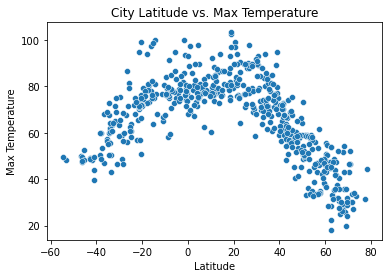

In [7]:
# Assign features to the axis
x_axis = city_df["Lat"]
y_axis = city_df["Max Temp"]

# Create the graph
sns.scatterplot(x = x_axis, y = y_axis)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Same graph as an image
plt.savefig("Images/Latitude vs Max Temp.png")
plt.show()

#### 2.2.2 Latitude vs. Humidity

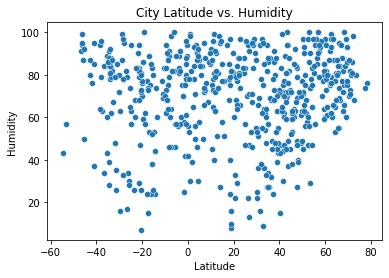

In [8]:
# Assign features to the axis
x_axis = city_df["Lat"]
y_axis = city_df["Humidity"]

# Create the graph
sns.scatterplot(x = x_axis, y = y_axis)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Same graph as an image
plt.savefig("Images/Latitude vs Humidity.png")
plt.show()

#### 2.2.3 Latitude vs. Cloudiness

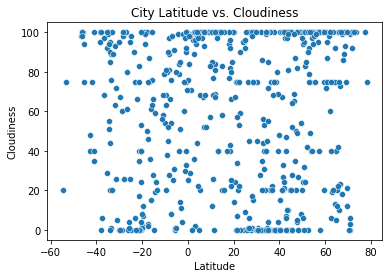

In [9]:
# Assign features to the axis
x_axis = city_df["Lat"]
y_axis = city_df["Cloudiness"]

# Create the graph
sns.scatterplot(x = x_axis, y = y_axis)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Same graph as an image
plt.savefig("Images/Latitude vs Cloudiness.png")
plt.show()

#### 2.2.4 Latitude vs. Wind Speed

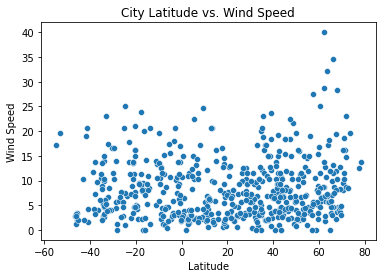

In [10]:
# Assign features to the axis
x_axis = city_df["Lat"]
y_axis = city_df["Wind Speed"]

# Create the graph
sns.scatterplot(x = x_axis, y = y_axis)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Same graph as an image
plt.savefig("Images/Latitude vs Wind Speed.png")
plt.show()

### 2.3 Linear Regression

In [11]:
# Create a new DataFrame containing only cities from the northern hemisphere
north_df = city_df[city_df["Lat"] > 0]
south_df = city_df[city_df["Lat"] < 0]

print(f'There are {len(north_df)} cities in the northern hemisphere and {len(south_df)} cities in the southern hemisphere.')

There are 386 cities in the northern hemisphere and 174 cities in the southern hemisphere.


#### 2.3.1 Northern Hemisphere - Temperature vs. Latitude

R squared: 0.6973857465721346


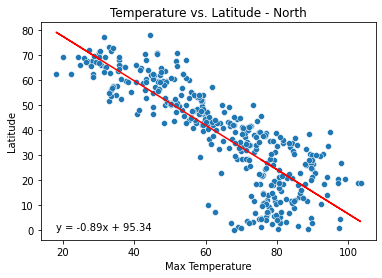

In [12]:
# Create the x and y values
x_values = north_df["Max Temp"]
y_values = north_df["Lat"]

# Run a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
sns.scatterplot(x = x_values, y = y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()))

# Label plot
plt.title("Temperature vs. Latitude - North")
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")

# Print r square value
print(f"R squared: {rvalue**2}")

# Save plot and display
plt.savefig("Images/Temperature Regression North.png")
plt.show()

#### 2.3.2 Southern Hemisphere - Temperature vs. Latitude

R squared: 0.5499363891664004


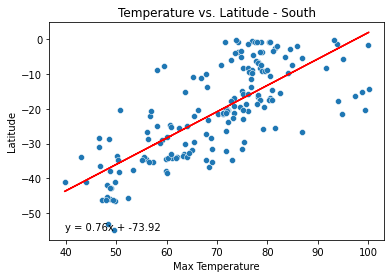

In [13]:
# Create the x and y values
x_values = south_df["Max Temp"]
y_values = south_df["Lat"]

# Run a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
sns.scatterplot(x = x_values, y = y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()))

# Label plot
plt.title("Temperature vs. Latitude - South")
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")

# Print r square value
print(f"R squared: {rvalue**2}")

# Save plot and display
plt.savefig("Images/Temperature Regression South.png")
plt.show()

#### 2.3.3 Northern Hemisphere - Humidity vs. Latitude

R squared: 0.011489248167467984


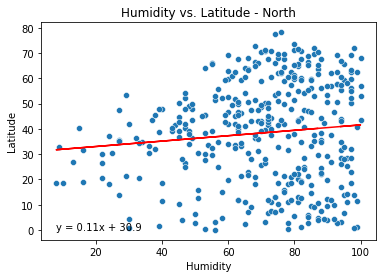

In [14]:
# Create the x and y values
x_values = north_df["Humidity"]
y_values = north_df["Lat"]

# Run a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
sns.scatterplot(x = x_values, y = y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()))

# Label plot
plt.title("Humidity vs. Latitude - North")
plt.xlabel("Humidity")
plt.ylabel("Latitude")

# Print r square value
print(f"R squared: {rvalue**2}")

# Save plot and display
plt.savefig("Images/Humidity Regression North.png")
plt.show()

#### 2.3.4 Southern Hemisphere - Humidity vs. Latitude

R squared: 0.0018718459166746633


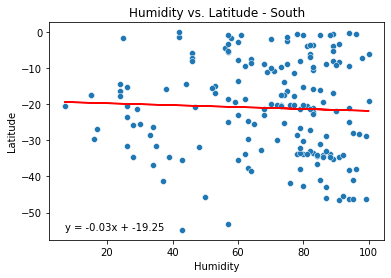

In [15]:
# Create the x and y values
x_values = south_df["Humidity"]
y_values = south_df["Lat"]

# Run a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
sns.scatterplot(x = x_values, y = y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()))

# Label plot
plt.title("Humidity vs. Latitude - South")
plt.xlabel("Humidity")
plt.ylabel("Latitude")

# Print r square value
print(f"R squared: {rvalue**2}")

# Save plot and display
plt.savefig("Images/Humidity Regression South.png")
plt.show()

#### 2.3.5 Northern Hemisphere - Cloudiness vs. Latitude

R squared: 0.000683144272620925


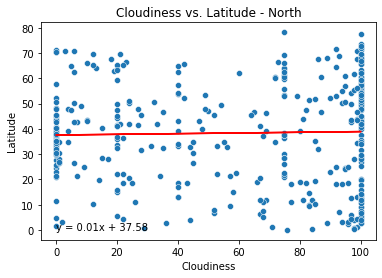

In [16]:
# Create the x and y values
x_values = north_df["Cloudiness"]
y_values = north_df["Lat"]

# Run a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
sns.scatterplot(x = x_values, y = y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()))

# Label plot
plt.title("Cloudiness vs. Latitude - North")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")

# Print r square value
print(f"R squared: {rvalue**2}")

# Save plot and display
plt.savefig("Images/Cloudiness Regression North.png")
plt.show()

#### 2.3.6 Southern Hemisphere - Cloudiness vs. Latitude

R squared: 0.0086409320549539


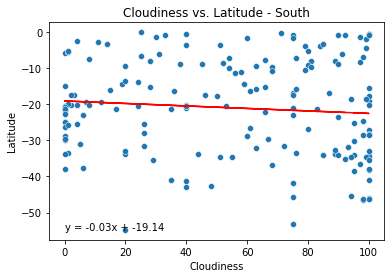

In [17]:
# Create the x and y values
x_values = south_df["Cloudiness"]
y_values = south_df["Lat"]

# Run a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
sns.scatterplot(x = x_values, y = y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()))

# Label plot
plt.title("Cloudiness vs. Latitude - South")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")

# Print r square value
print(f"R squared: {rvalue**2}")

# Save plot and display
plt.savefig("Images/Cloudiness Regression South.png")
plt.show()

#### 2.3.7 Northern Hemisphere - Wind Speed vs. Latitude

R squared: 0.03991535063493936


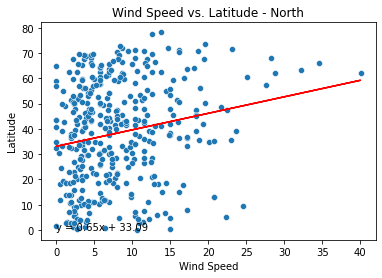

In [18]:
# Create the x and y values
x_values = north_df["Wind Speed"]
y_values = north_df["Lat"]

# Run a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
sns.scatterplot(x = x_values, y = y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()))

# Label plot
plt.title("Wind Speed vs. Latitude - North")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")

# Print r square value
print(f"R squared: {rvalue**2}")

# Save plot and display
plt.savefig("Images/Wind Speed Regression North.png")
plt.show()

#### 2.3.8 Southern Hemisphere - Wind Speed vs. Latitude

R squared: 0.0003180972519813436


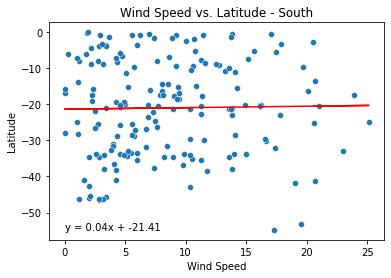

In [19]:
# Create the x and y values
x_values = south_df["Wind Speed"]
y_values = south_df["Lat"]

# Run a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot
sns.scatterplot(x = x_values, y = y_values)

# Plot the regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (x_values.min(), y_values.min()))

# Label plot
plt.title("Wind Speed vs. Latitude - South")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")

# Print r square value
print(f"R squared: {rvalue**2}")

# Save plot and display
plt.savefig("Images/Wind Speed Regression South.png")
plt.show()